Description: This program predicts employee attrition.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the data

In [2]:
df = pd.read_csv('G:/Nikhil Raja/East West Clg/7th SEM/Project/Internship Proj/Report/Final/WA_Fn-UseC_-HR-Employee-Attrition.csv')

Store the data into a dataframe and print the first 7 rows of data.

In [3]:
df.head(7) #Print the first 7 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


Get the number of rows and columns in the data.

In [4]:
#Get the number of rows and number of columns in the data
df.shape

(1470, 35)

1470 rows and 35 columns

Their are 1470 rows of data or employees in the data set and 35 columns or data points on each employee. Get the data types of each column.

In [5]:
#Get the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Get a count of the number of empty values in each column.

In [6]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Looks like their is no missing data since all of the columns are returning a value of 0. Let’s double check the data set for any missing values.

In [7]:
#Another check for any null / missing values
df.isnull().values.any()

False

The code above returned a value = False, indicates their are no missing values

View some basic statistics about the data like the percentile, mean , maximum, minimum etc.

In [8]:
#View some basic statistical details like percentile, mean, standard deviation etc.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Sample of some statistics on the data set

Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes) the company.

In [9]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

A count of employee attrition

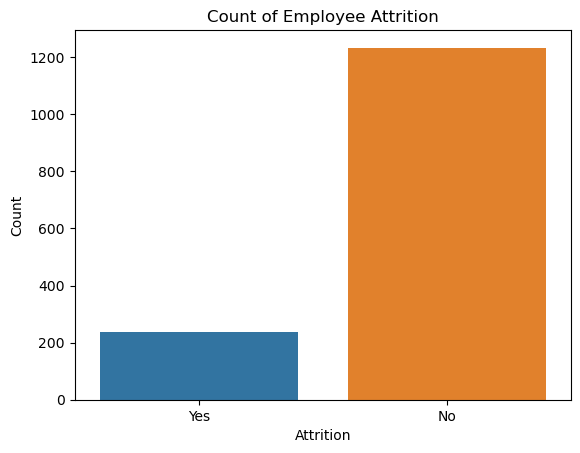

In [10]:
# Drop rows with missing values in 'Attrition' column
df = df.dropna(subset=['Attrition'])

# Plot the countplot for 'Attrition' column
sns.countplot(data=df, x='Attrition')

# Set plot labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Count of Employee Attrition')

# Display the plot
plt.show()

Visual count of employee attrition

Show the number of employees that left and stayed at the company by age.

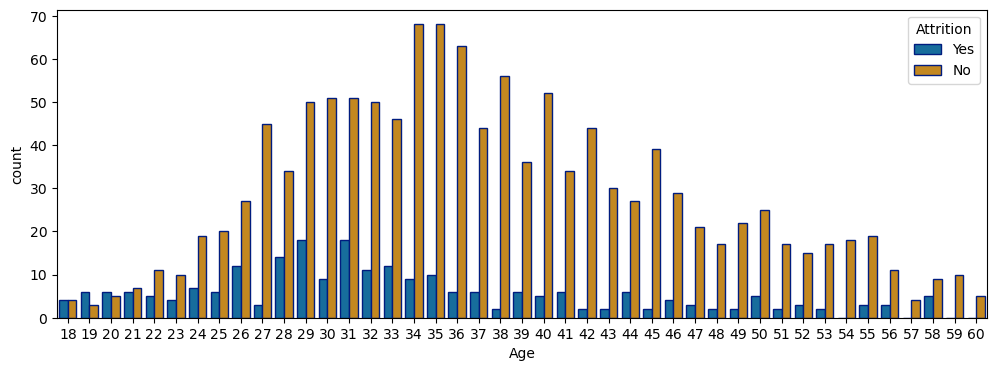

In [11]:
#Show the number of employees that left and stayed by age
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

The highest count of employee attrition is age 29 & 31. The age with the highest retention is age 34 & 35.

Print all of the object data types and print their unique values.

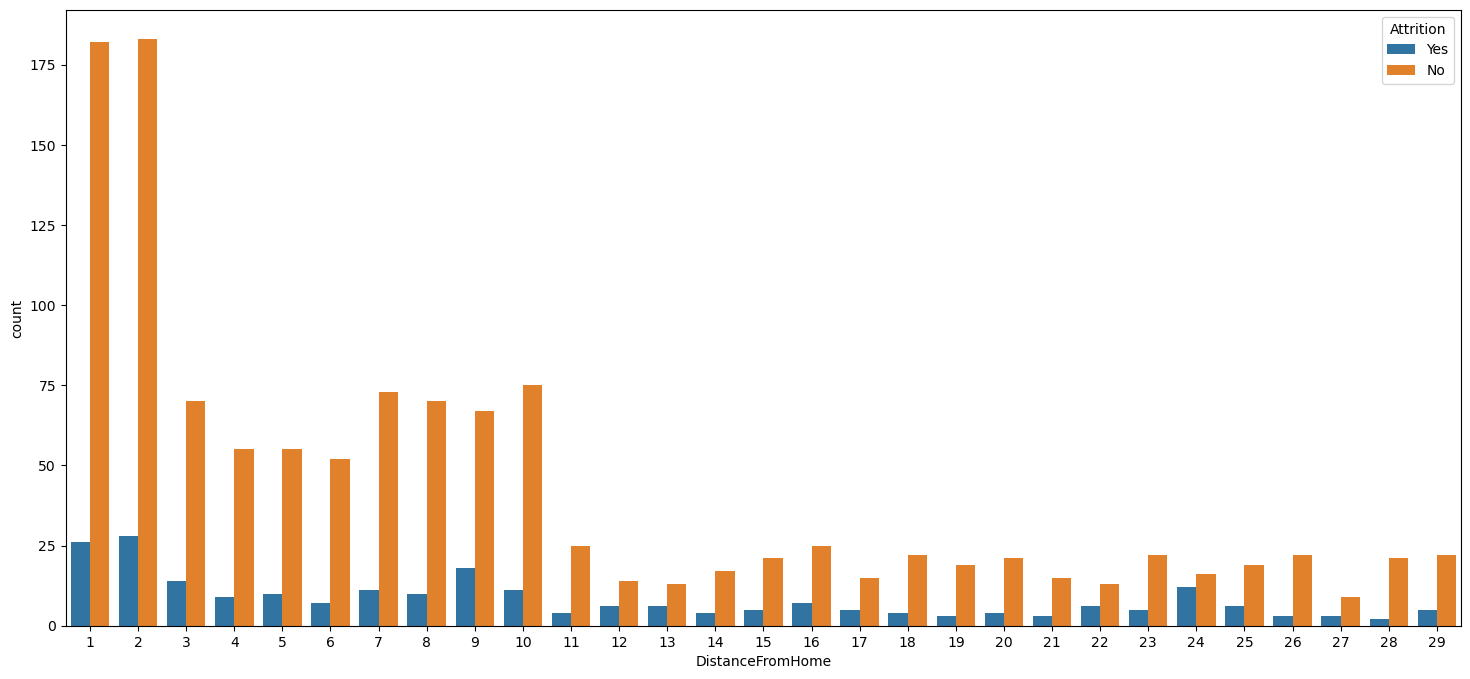

In [12]:
fig=plt.figure(figsize=(18,8))
sns.countplot(x='DistanceFromHome', hue='Attrition', data = df)
plt.show()

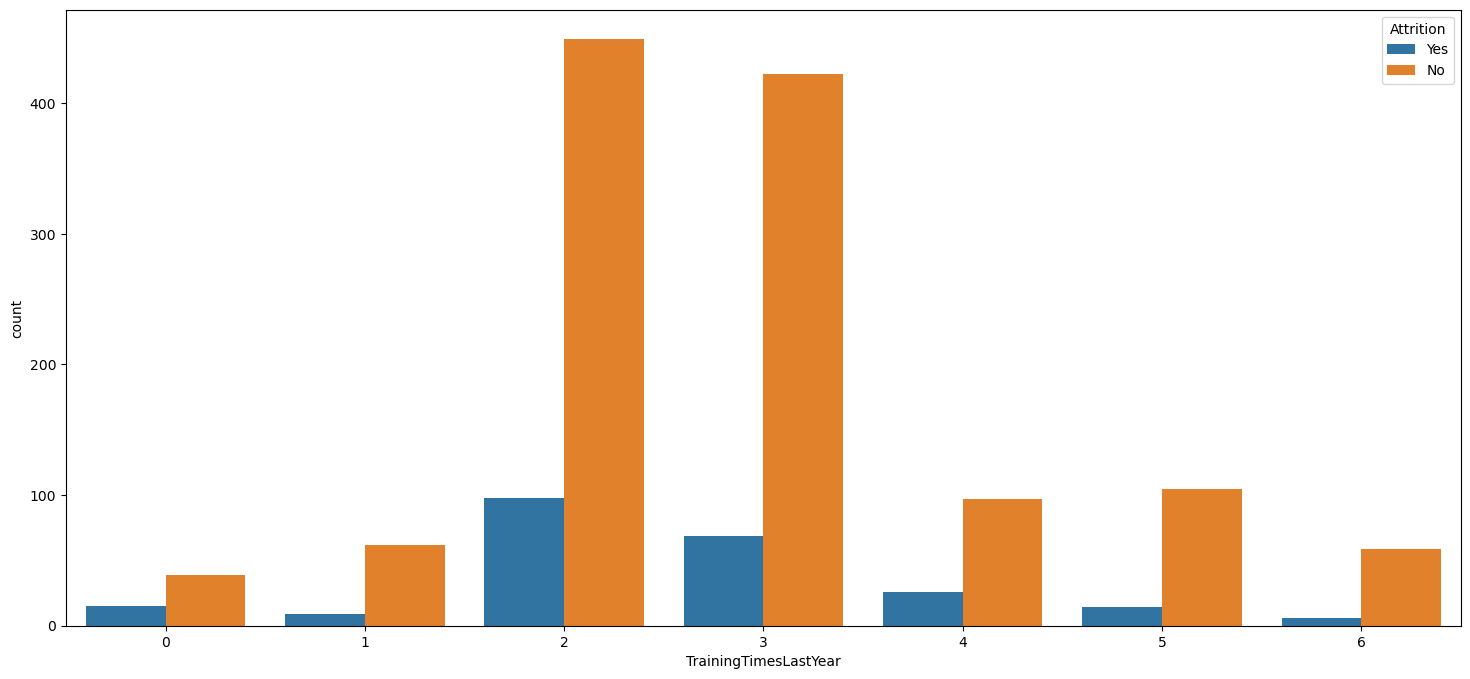

In [13]:
fig=plt.figure(figsize=(18,8))
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data = df)
plt.show()

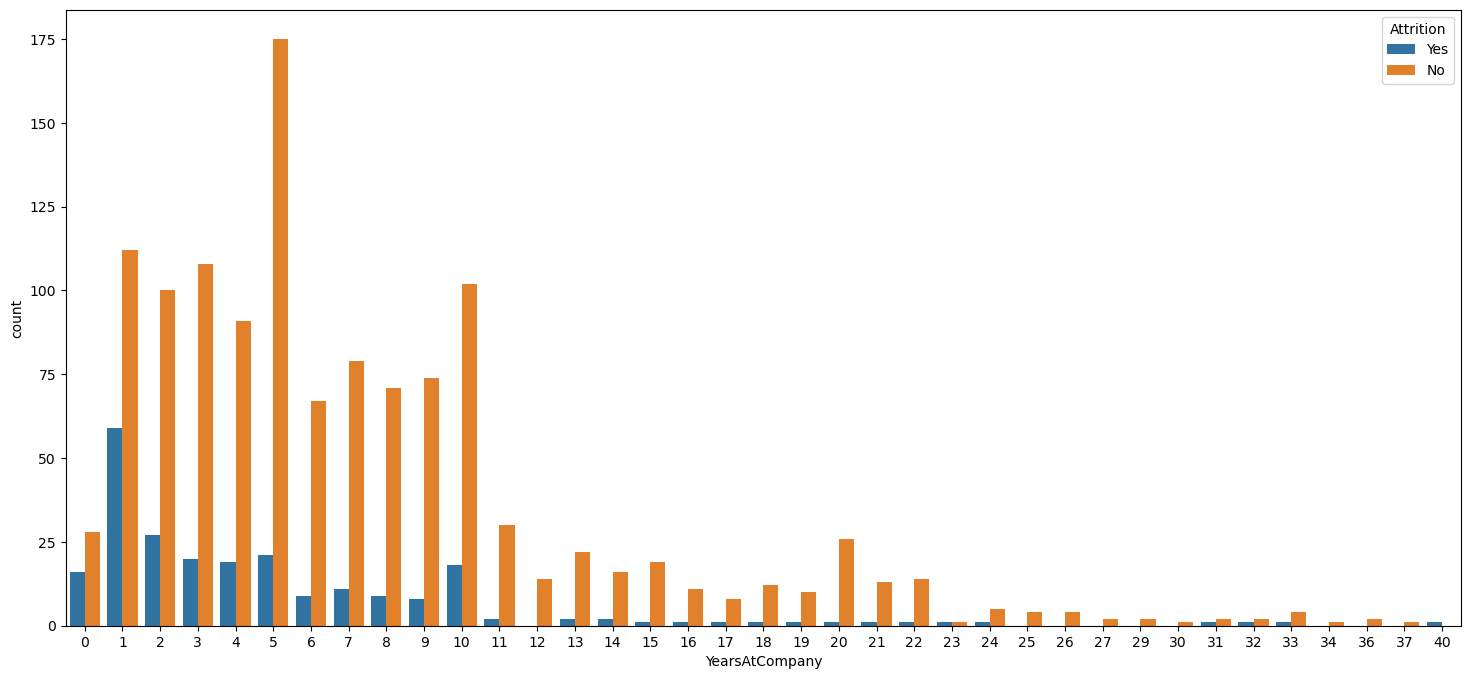

In [14]:
fig=plt.figure(figsize=(18,8))
sns.countplot(x='YearsAtCompany', hue='Attrition', data = df)
plt.show()

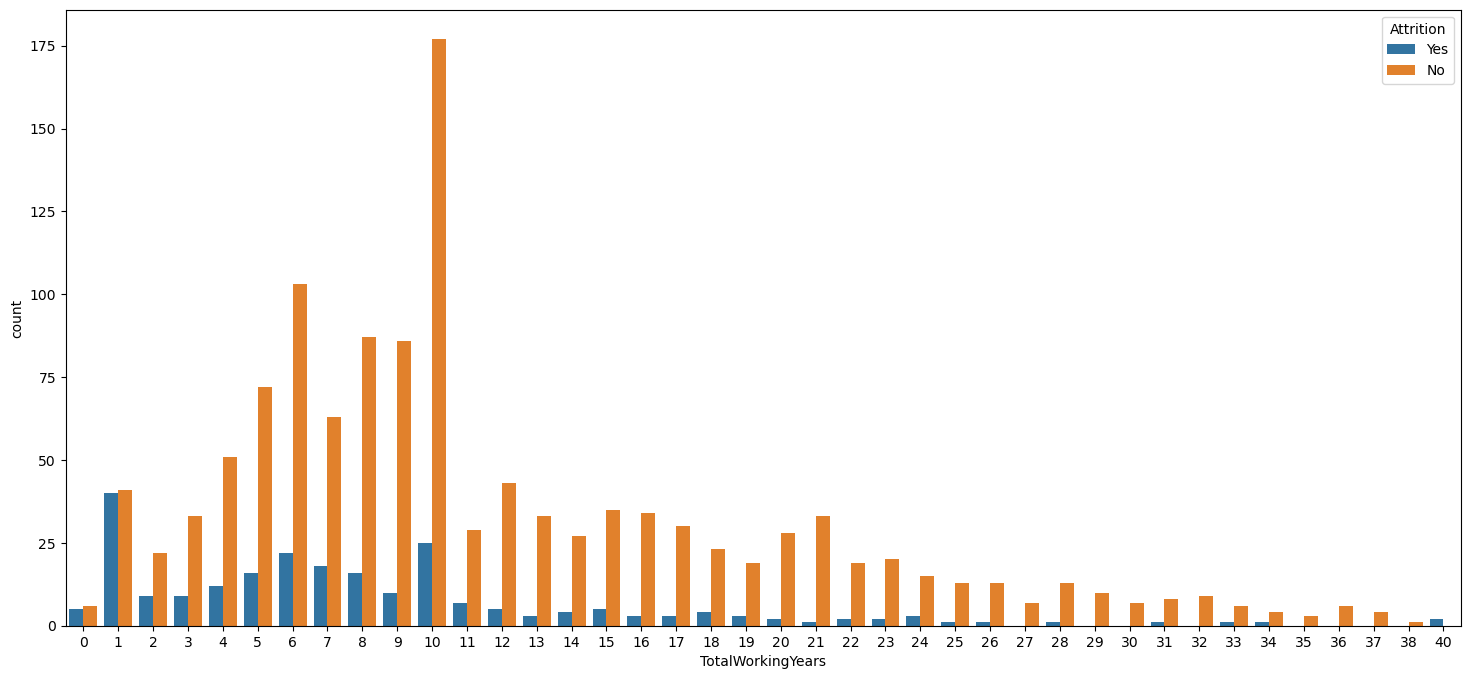

In [15]:
fig=plt.figure(figsize=(18,8))
sns.countplot(x='TotalWorkingYears', hue='Attrition', data = df)
plt.show()

In [16]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

These columns would not add any additional information to the model. We will remove these columns from the data set.

In [17]:
#Remove unneeded columns

#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'

Get the correlation of the columns.

In [18]:
#Get the correlation of the columns
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


Better visual of the correlation by using a heat map.

<Axes: >

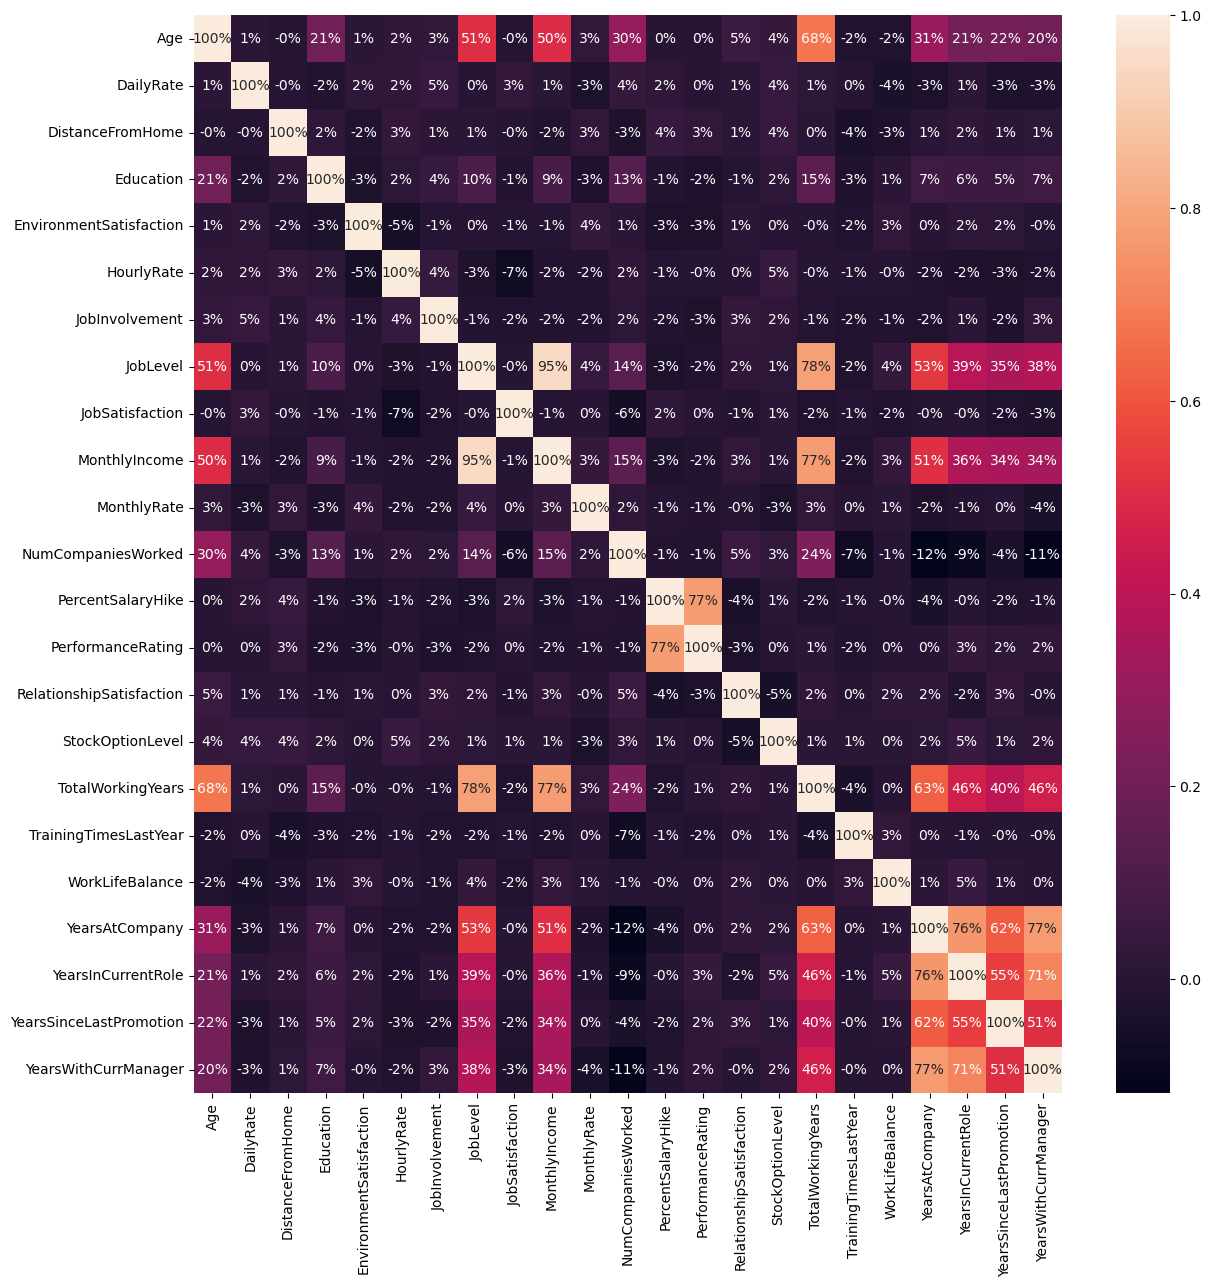

In [19]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

Prepare the data for the model. First transform non-numeric columns to numerical columns.

In [20]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

Create a new column to store the age values in. This is only to put the age values at the end of the data set. Remove the column age from the front of the data set so that the target column is first.

This is only to put the age values at the end of the data set.

In [21]:
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
#Show the dataframe
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


Split the data into independent ‘X’ and dependent ‘Y’ data sets.

In [22]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

Split the data set into 75% training and 25% testing data sets.

In [23]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Use the Random Forest Classifier to learn from the training data and see how accurate it is on that data.

In [24]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Get the accuracy of the model.

In [25]:
#Get the accuracy on the training data
forest.score(X_train, Y_train)

0.9791288566243194

The model is about 97.9% accurate on the training data

The confusion matrix and accuracy of the model.

In [26]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[309   1]
 [ 49   9]]
Model Testing Accuracy = "0.8641304347826086!"



The model correctly identified 86.41% of the employees that left the company.

Important features according to our model

In [27]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.071
Age_Years,0.067
DailyRate,0.067
MonthlyRate,0.055
HourlyRate,0.052
TotalWorkingYears,0.051
YearsWithCurrManager,0.048
JobRole,0.044
DistanceFromHome,0.042


Visualization of the data

<Axes: xlabel='feature'>

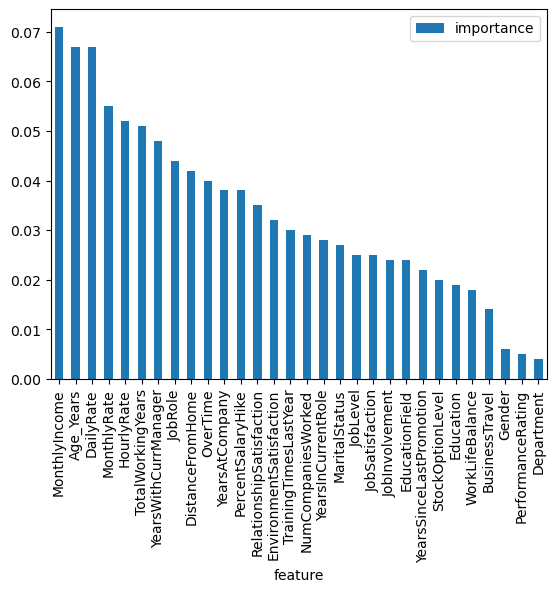

In [28]:
#Visualize the importance
importances.plot.bar()

Monthly income appears to be the most important feature followed by the persons age, daily rate, and monthly rate.